## train with bigger set sizes
Goal here was to test what happens when set size > 8.

In [1]:
from pathlib import Path

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import searchnets

In [2]:
results_dir = Path('/home/bart/Documents/repos/L2M/visual-search-nets/data/results/')
data_prep_dir = Path('/home/bart/Documents/repos/L2M/visual-search-nets/data/data_prepd_for_nets/')

In [10]:
data_gz_paths = sorted(list(data_prep_dir.glob('alexnet*train_big_set_size*gz')))
data_gz_paths = [str(path) for path in data_gz_paths]

results_gz_paths = sorted(list(results_dir.glob('*/*train_big_set_size*gz')))
results_gz_paths = [str(path) for path in results_gz_paths]

In [12]:
results_gz_paths

['/home/bart/Documents/repos/L2M/visual-search-nets/data/results/alexnet_train_big_set_size_RVvGV/searchnets_alexnet_train_big_set_size_RVvGV_trained_200_epochs_test_results.gz',
 '/home/bart/Documents/repos/L2M/visual-search-nets/data/results/alexnet_train_big_set_size_RVvRHGV/searchnets_alexnet_train_big_set_size_RVvRHGV_trained_200_epochs_test_results.gz']

In [11]:
data_gz_paths

['/home/bart/Documents/repos/L2M/visual-search-nets/data/data_prepd_for_nets/alexnet_train_big_set_size_2_v_5_data.gz',
 '/home/bart/Documents/repos/L2M/visual-search-nets/data/data_prepd_for_nets/alexnet_train_big_set_size_RVvGV_data.gz',
 '/home/bart/Documents/repos/L2M/visual-search-nets/data/data_prepd_for_nets/alexnet_train_big_set_size_RVvRHGV_data.gz']

In [13]:
# HACK
data_gz_paths = data_gz_paths[1:]

In [18]:
searchnets.utils.general.results_csv(data_prep_dir,
                                     results_dir,
                                     test_csv_path='./alexnet_train_big_set_size_data.csv',
                                     nets=('alexnet',),
                                     train_types=('train_big_set_size',),
                                     stims=('RVvGV', 'RVvRHGV'),
                                     target_condition=('present', 'absent'),
                                     data_gz_paths=data_gz_paths,
                                     results_gz_paths=results_gz_paths)

In [19]:
atbss_df = pd.read_csv('alexnet_train_big_set_size_data.csv')

In [22]:
atbss_df.head()

,Unnamed: 0,net_name,train_type,net_number,stimulus,target_condition,set_size,accuracy
0,0,alexnet,train_big_set_size,0,RVvGV,present,1,1.0
1,1,alexnet,train_big_set_size,0,RVvGV,present,2,1.0
2,2,alexnet,train_big_set_size,0,RVvGV,present,4,1.0
3,3,alexnet,train_big_set_size,0,RVvGV,present,6,1.0
4,4,alexnet,train_big_set_size,0,RVvGV,present,8,1.0


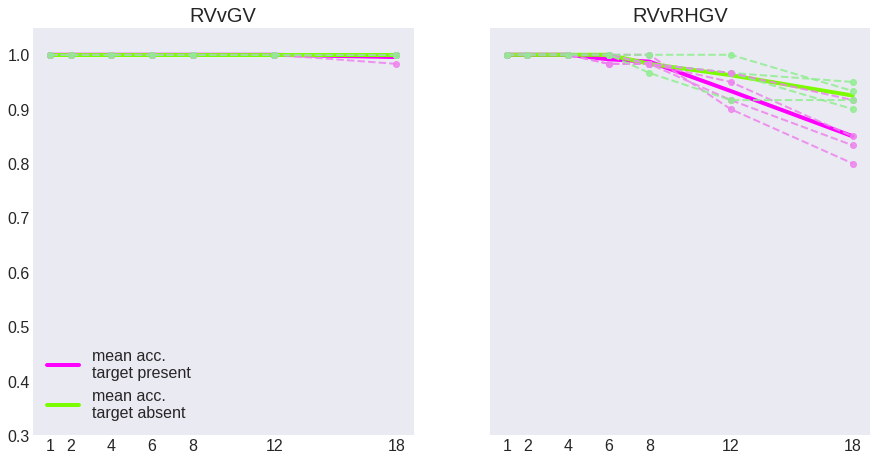

In [25]:
figsize=(15,7.5)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

for col, (stim_name, stim_abbrev) in enumerate(zip(
    ['feature', 'conjunction',],
    ['RVvGV', 'RVvRHGV',])):
        if col==0:
            add_legend=True
        else:
            add_legend=False

        searchnets.plot.acc_v_set_size_df(df=atbss_df, net_name='alexnet',
                                          train_type='train_big_set_size', stimulus=stim_abbrev, 
                                          ylim=(0.3, 1.05), ax=ax[col], add_legend=add_legend)
        ax[col].set_title(stim_abbrev)

Above result suggests that, no, simply increaseing the learning rate was not enough.